In [6]:
import IPython
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from country_converter import CountryConverter
from IPython.display import display

In [7]:
cc = CountryConverter()

In [8]:
file_path = r"C:\Users\Hp\Downloads\dataset.xlsx"
df = pd.read_excel(file_path)

In [9]:
df.head()

,Operator,Operator Country,Continent,Supplier ID,Suppier Name,User ID,Beneficial User,Product Type,OAC ID,Product ID,...,User Amount,User Currency,User Amount (£),Calculated Cost,Product Cost Curr.,Calculated Cost (£),Buy Margin (£),Margin (£),Margin %,No. of Transactions
0,Afghanistan Afghan Wireless,Afghanistan,Asia,159,Reloadly,4.0,Overseas Top Up,Mobile Top Up,2308,6362,...,10.00,GBP,10.000000,10.0005,USD,7.899395,-1.024139,2.100605,0.210061,2
1,Afghanistan Afghan Wireless,Afghanistan,Asia,159,Reloadly,809109474.0,Geopoll,Mobile Top Up,2308,6362,...,20.72,USD,16.366728,18.6676,USD,14.745537,-1.911726,1.621191,0.099054,28
2,Afghanistan Etisalat,Afghanistan,Asia,159,Reloadly,4.0,Overseas Top Up,Mobile Top Up,2270,6363,...,90.00,GBP,90.000000,90.0178,USD,71.105060,-9.218589,18.894940,0.209944,14
3,Afghanistan Etisalat,Afghanistan,Asia,159,Reloadly,845040414.0,Find and Save GBP,Mobile Top Up,2270,6363,...,6.22,GBP,6.220000,6.6670,USD,5.266263,-0.682759,0.953737,0.153334,1
4,Afghanistan Roshan,Afghanistan,Asia,159,Reloadly,4.0,Overseas Top Up,Mobile Top Up,2306,3022,...,40.00,GBP,40.000000,40.0020,USD,31.597580,-4.096556,8.402420,0.210061,5


In [10]:
revenue_by_client = df.groupby('Beneficial User')['Buy Margin (£)'].sum()

In [11]:
highest_revenue_client = revenue_by_client.idxmax()
highest_revenue_amount = revenue_by_client.max()

In [12]:
print("Client with the highest revenue:", highest_revenue_client)
print("Revenue generated by the client:", highest_revenue_amount)

Client with the highest revenue: Access Bank NG Direct
Revenue generated by the client: 324803.6439538005


In [13]:
revenue_by_operator = df.groupby('Operator')['Buy Margin (£)'].sum()

In [14]:
highest_revenue_operator = revenue_by_operator.idxmax()
highest_revenue_amount = revenue_by_operator.max()

In [15]:
print("Operator with the highest revenue:", highest_revenue_operator)
print("Revenue generated by the operator:", highest_revenue_amount)

Operator with the highest revenue: Nigeria MTN
Revenue generated by the operator: 377610.5066229545


In [16]:
revenue_by_client = df.groupby('Beneficial User')['Buy Margin (£)'].sum()

In [17]:
top_client = revenue_by_client.idxmax()
top_client_revenue = revenue_by_client.max()

In [18]:
print("Top client in terms of revenue:", top_client)
print("Revenue generated by the top client:", top_client_revenue)

Top client in terms of revenue: Access Bank NG Direct
Revenue generated by the top client: 324803.6439538005


In [19]:
total_revenue = df['Buy Margin (£)'].sum()

In [20]:
percentage_contribution = (top_client_revenue / total_revenue) * 100

In [21]:
print("Percentage of revenue contributed by the top client: {:.2f}%".format(percentage_contribution))

Percentage of revenue contributed by the top client: 46.65%


In [22]:
revenue_by_client = df.groupby('Beneficial User')['Buy Margin (£)'].sum()

In [23]:
top_10_clients = revenue_by_client.sort_values(ascending=False).head(10)

In [24]:
print("Top 10 clients:")
print(top_10_clients)

Top 10 clients:
Beneficial User
Access Bank NG Direct          324803.643954
Team APT                       134462.024255
Kuda MFB - PREPAID             129773.688300
UBA Group NGN API - UMobile     47430.198911
IDT USD API                     17561.141816
Broadshift                      13616.625498
MTN Swaziland [SZL]              4790.873342
Stanbic IBTC Bank API            4360.137080
Bit Refill EUR                   3293.094851
Nobel Globe Live Account         2184.588750
Name: Buy Margin (£), dtype: float64


In [25]:
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

In [26]:
revenue_by_date = df.groupby('Date')['Buy Margin (£)'].sum()

In [27]:
date_with_highest_revenue = revenue_by_date.idxmax()

In [28]:
total_revenue = df['Buy Margin (£)'].sum()
percentage_contribution = (revenue_by_date[date_with_highest_revenue] / total_revenue) * 100

In [30]:
print("Date with the highest revenue:", date_with_highest_revenue)
print("Percentage contribution of the day's revenue: {:.2f}%".format(percentage_contribution))

Date with the highest revenue: 2023-07-04 00:00:00
Percentage contribution of the day's revenue: 6.96%


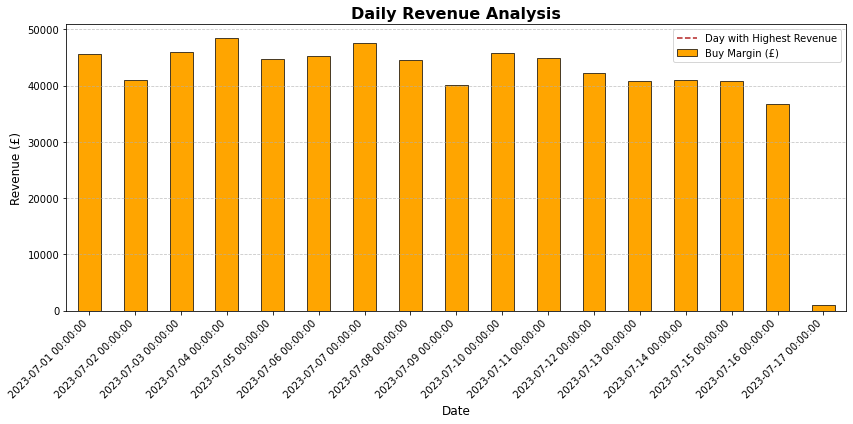

In [35]:
plt.figure(figsize=(12, 6))
revenue_by_date.plot(kind='bar', color='Orange', edgecolor='black', linewidth=0.7)
plt.axvline(x=date_with_highest_revenue, color='firebrick', linestyle='--', label='Day with Highest Revenue')
plt.title('Daily Revenue Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
revenue_by_operator = df.groupby('Operator')['Buy Margin (£)'].sum()

In [46]:
operator_with_max_revenue = revenue_by_operator.idxmax()

In [47]:
operator_with_max_revenue = revenue_by_operator.idxmax()

In [48]:
print("Operator with the highest revenue:", operator_with_max_revenue)

Operator with the highest revenue: Nigeria MTN


In [49]:
sorted_revenue = revenue_by_operator.sort_values(ascending=False)

In [50]:
top_10_operators = sorted_revenue.head(10)

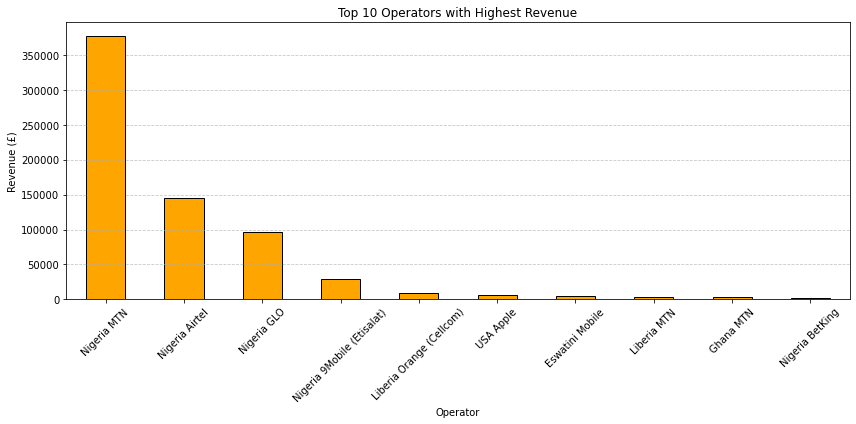

In [53]:
plt.figure(figsize=(12, 6))
top_10_operators.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Operators with Highest Revenue')
plt.xlabel('Operator')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
df['Continent'] = df['Operator Country'].apply(lambda country: cc.convert(names=country, to='continent'))

In [63]:
df['Profit'] = df['User Amount (£)'] - df['Calculated Cost (£)']

In [65]:
revenue_breakdown = df.groupby(['Operator', 'Operator Country', 'Continent', 'Operator Currency'])['Profit'].sum().reset_index()

In [68]:
revenue_breakdown = revenue_breakdown.sort_values(by='Profit', ascending=False)

In [69]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [70]:
#print(revenue_breakdown)
display(revenue_breakdown)

,Operator,Operator Country,Continent,Operator Currency,Profit
199,Nigeria MTN,Nigeria,Africa,NGN,380894.560998
182,Nigeria Airtel,Nigeria,Africa,NGN,145602.510521
190,Nigeria GLO,Nigeria,Africa,NGN,96830.102991
308,USA Apple,United States of America,America,USD,25089.565766
180,Nigeria 9Mobile (Etisalat),Nigeria,Africa,NGN,19520.444833
143,Liberia Orange (Cellcom),Liberia,Africa,USD,4976.319783
68,Eswatini Mobile,Swaziland,Africa,SZL,4909.953391
185,Nigeria BetKing,Nigeria,Africa,NGN,2546.153461
184,Nigeria Bet 9ja,Nigeria,Africa,NGN,2494.969789
142,Liberia MTN,Liberia,Africa,USD,2248.371184


In [80]:
product_revenue = df.groupby('Product Name')['Buy Margin (£)'].sum().reset_index()

In [81]:
least_performing_products = product_revenue.sort_values(by='Buy Margin (£)', ascending=True)

In [82]:
top_10_least_performing_products = least_performing_products.head(10)

In [83]:
print("Top 10 Least Performing Products:")
print(least_performing_products)

Top 10 Least Performing Products:
                                          Product Name  Buy Margin (£)
96                              10000MMK Mobile Top up     -375.114714
97                                     10000MMK Top Up     -332.185679
254                                    20000MMK Top up     -317.408163
443                                 5-200CAD Gift Card     -271.143109
489                              5000MMK Mobile Top Up     -218.670684
253                             20000MMK Mobile Top up     -189.315845
350                                    30000MMK Top Up     -166.472414
85                             1000-12000NR Gift Cards     -166.378060
490                                     5000MMK Top Up     -129.281850
471                                 50-5000 AFN Top Up     -111.248046
259                                      200EGP Top Up     -107.345819
349                             30000MMK Mobile Top up      -93.947704
58                               100 - 4000

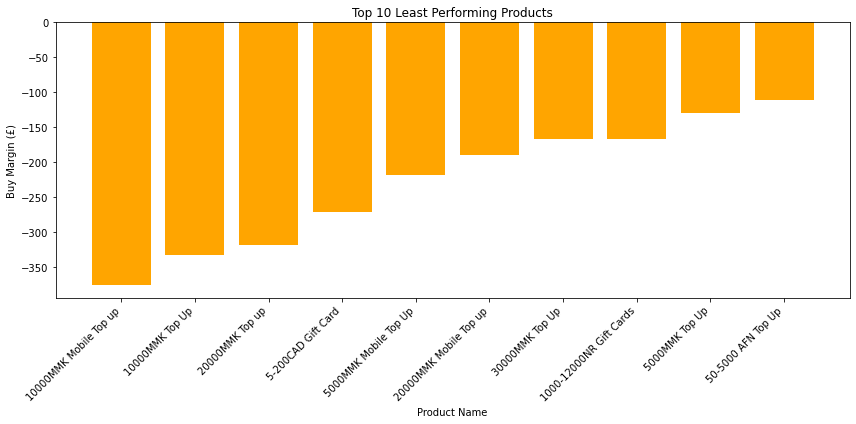

In [85]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_least_performing_products['Product Name'], top_10_least_performing_products['Buy Margin (£)'], color='Orange')
plt.title('Top 10 Least Performing Products')
plt.xlabel('Product Name')
plt.ylabel('Buy Margin (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()